**IE 6400 FUNDAMENTALS OF DATA ANALYTICS (GROUP - 08)**

**1)** *YASH HARALE*

**2)** *SAKSHI ARYAL*

**3)** *SHRUTHI KASHETTY*

In [26]:
#Initialization

import os
import pandas as pd
import numpy as np
from scipy import signal
import glob  
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, LSTM, Dense
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from scipy.stats import skew, kurtosis
from scipy.signal import welch

DATA PREPROCESSING :

In [27]:
#Preprocessing the data

all_data = []
all_names = []
for folder in os.listdir(r'C:\1st SEM subjs\FDA\project3\bonn'):
    for file in glob.glob(os.path.join(r'C:\1st SEM subjs\FDA\project3\bonn', folder, '*.txt')):
        data = np.loadtxt(file)
        all_data.append(data)
        all_names.append(folder)
all_data=np.array(all_data)

In [28]:
#Loading all data

all_data

array([[  34.,   33.,   28., ...,   39.,   41.,    7.],
       [  60.,   47.,   38., ...,  149.,  126.,   42.],
       [  26.,   16.,   13., ...,  114.,   99., -130.],
       ...,
       [ -51.,  -42.,  -39., ...,   -2.,    0.,  -49.],
       [  56.,   55.,   38., ...,  -32.,   -4.,   69.],
       [ -36.,  -71., -120., ...,    3.,  -13.,   30.]])

In [29]:
#Loading all names

all_names

['F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N'

PLOTTING THE EEG SIGNALS :

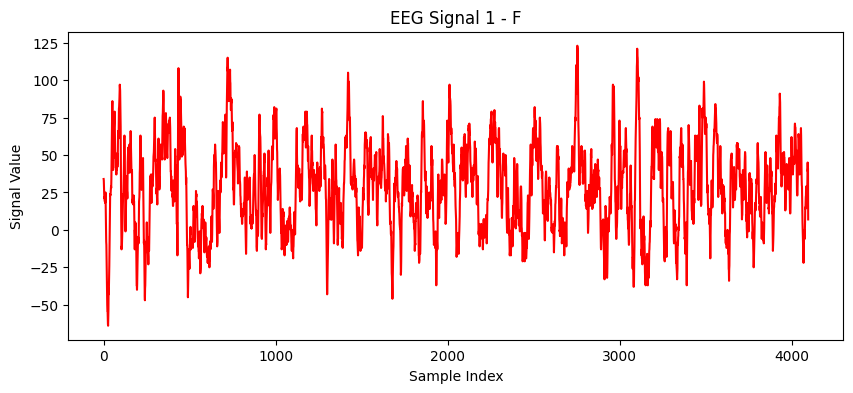

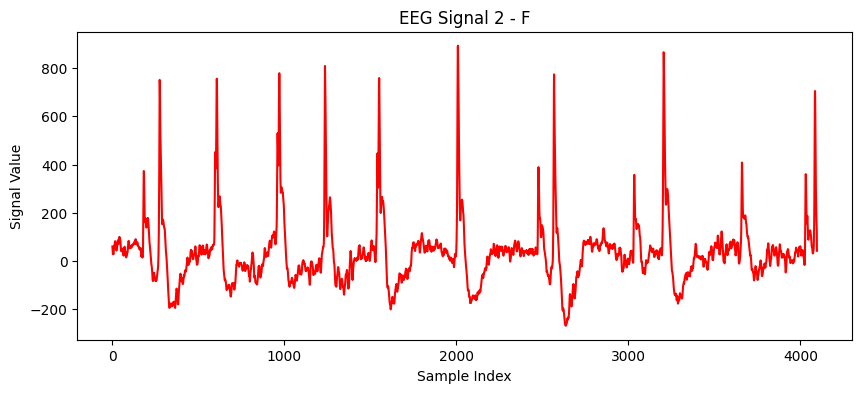

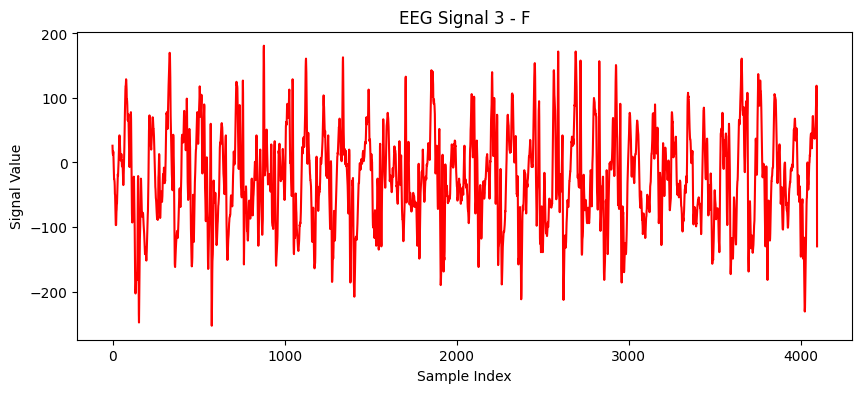

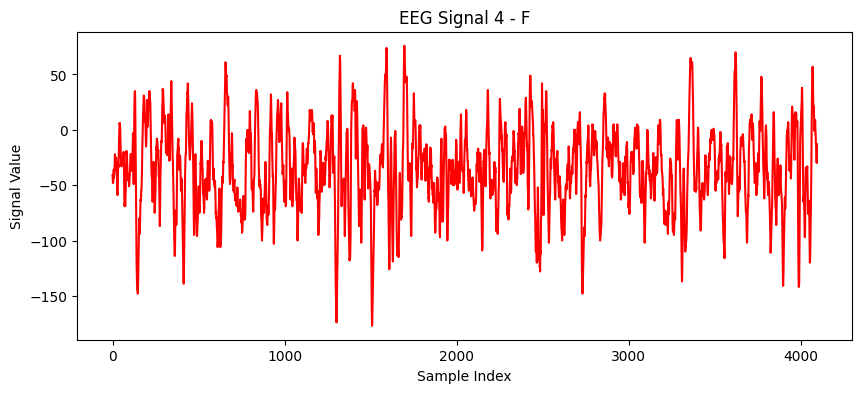

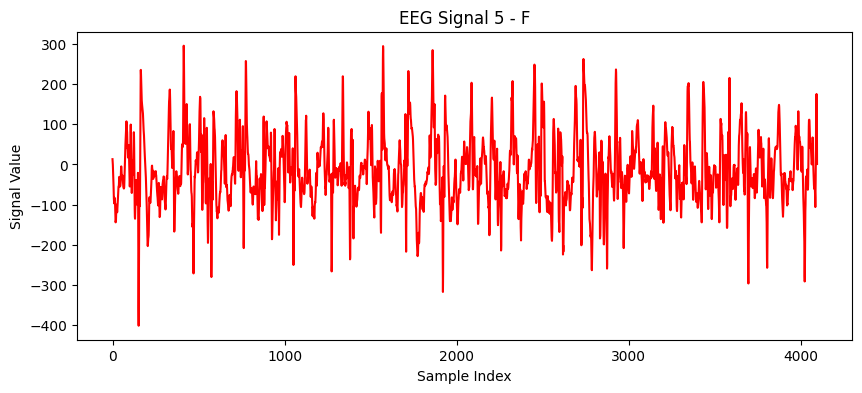

In [30]:
# Defining the number of signals to plot
num_signals_to_plot = 5

# Plotting each EEG signal separately
for i in range(min(num_signals_to_plot, all_data.shape[0])):
    plt.figure(figsize=(10, 4))
    plt.plot(all_data[i, :],color='red')
    plt.title(f'EEG Signal {i + 1} - {all_names[i]}')
    plt.xlabel('Sample Index')
    plt.ylabel('Signal Value')
    plt.show()

CHECKING FOR MISSSING VALUES :

In [31]:
# Check for missing values

missing_values = np.isnan(all_data).sum()
print("Missing Values:\n", missing_values)

Missing Values:
 0


PREPROCESSING THE EEG DATA :

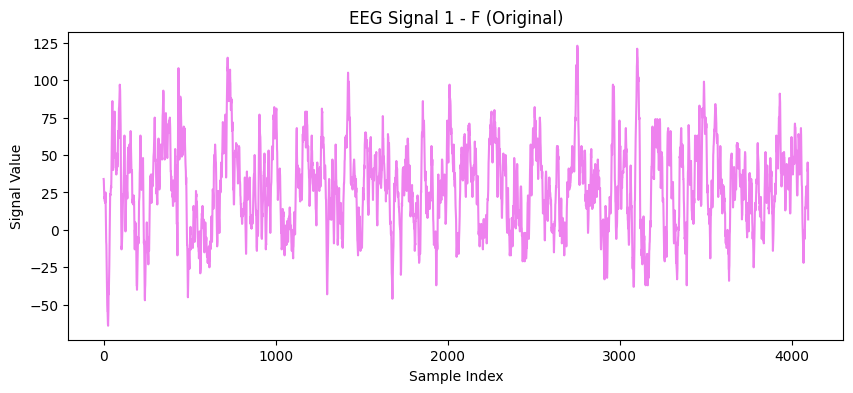

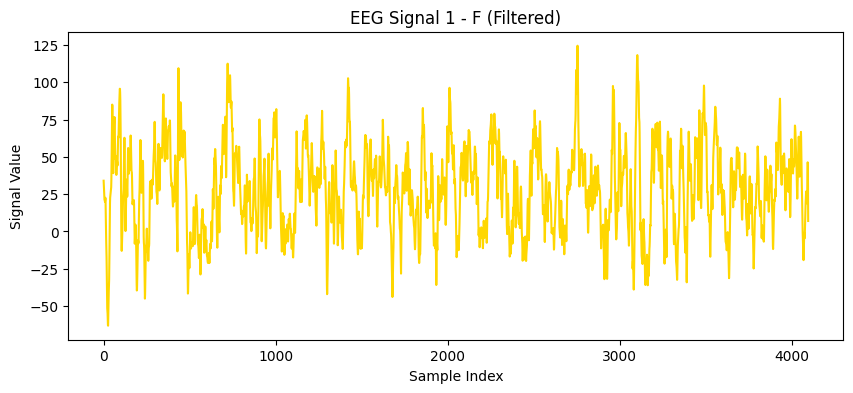

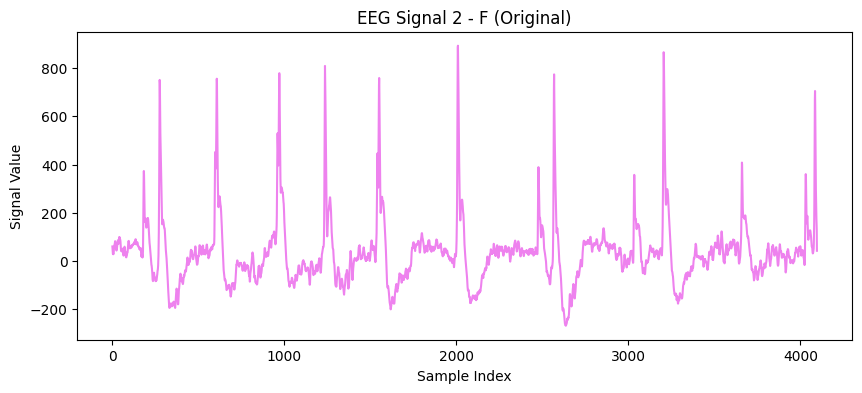

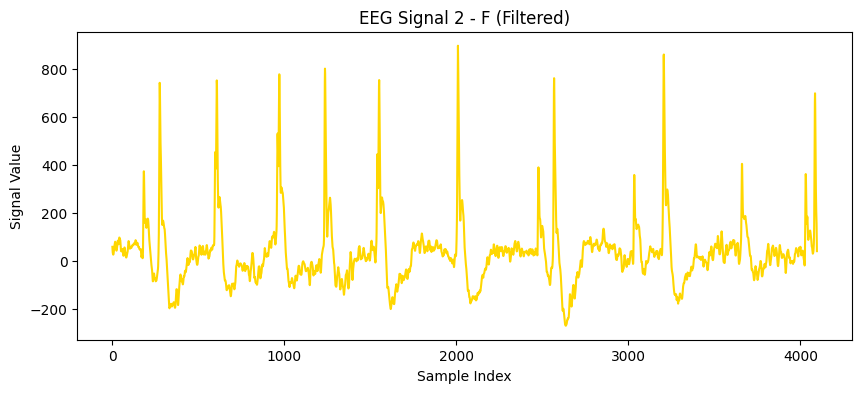

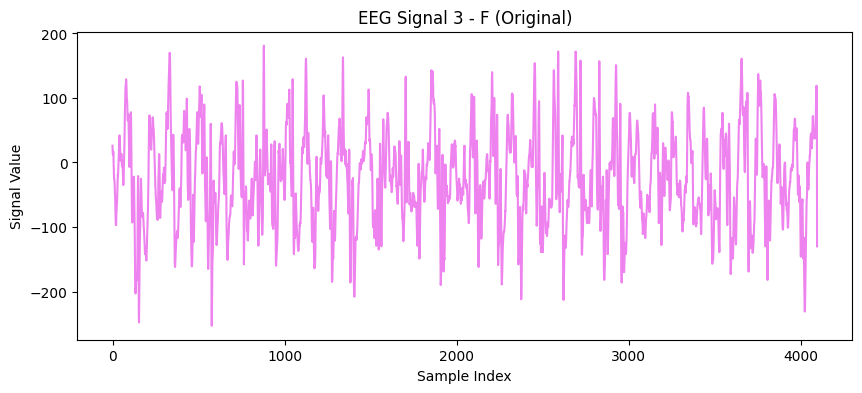

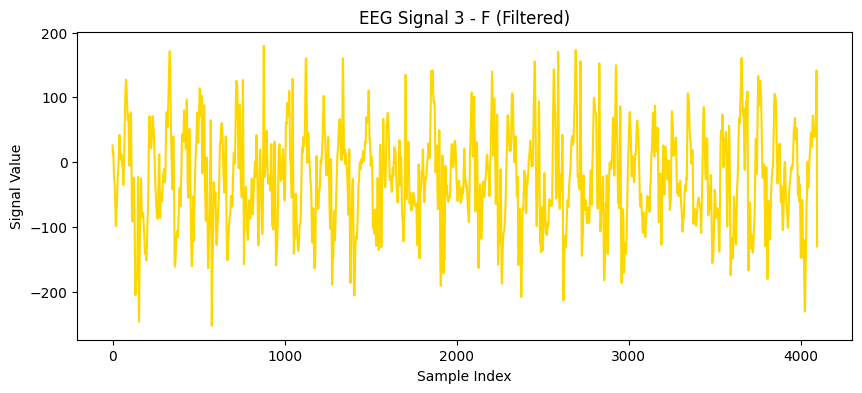

In [32]:
# Preprocessing the EEG data

fs = 250 
cutoff_freq = 50 
b, a = signal.butter(4, cutoff_freq / (fs / 2), 'low')

# Applying the filter to each EEG sample
all_data_filtered = signal.filtfilt(b, a, all_data)

# Plotting a few samples
num_samples_to_plot = 3

for i in range(min(num_samples_to_plot, all_data.shape[0])):
    plt.figure(figsize=(10, 4))
    plt.plot(all_data[i, :],color='violet')  # Plotting the original signal
    plt.title(f'EEG Signal {i + 1} - {all_names[i]} (Original)')
    plt.xlabel('Sample Index')
    plt.ylabel('Signal Value')
    plt.show()

    plt.figure(figsize=(10, 4))
    plt.plot(all_data_filtered[i, :],color='gold')  # Plotting the filtered signal
    plt.title(f'EEG Signal {i + 1} - {all_names[i]} (Filtered)')
    plt.xlabel('Sample Index')
    plt.ylabel('Signal Value')
    plt.show()

DISPLAYING THE BASIC INFORMATION ABOUT DATA :

Data shape: (500, 4097)
Summary statistics:
              0            1            2            3            4     \
count  500.000000   500.000000   500.000000   500.000000   500.000000   
mean    -3.718000    -9.802000   -16.094000   -18.820000   -16.662000   
std    145.274622   163.176469   188.246611   201.245888   188.973686   
min   -985.000000 -1221.000000 -1406.000000 -1395.000000 -1291.000000   
25%    -48.250000   -54.000000   -52.000000   -52.250000   -53.000000   
50%     -8.000000    -8.000000    -7.000000    -9.000000    -8.500000   
75%     36.000000    36.250000    37.250000    38.000000    41.000000   
max    800.000000   839.000000   857.000000   876.000000   893.000000   

             5           6            7            8            9     ...  \
count  500.000000  500.000000   500.000000   500.000000   500.000000  ...   
mean   -12.124000   -6.510000    -2.142000     1.882000     4.438000  ...   
std    165.080719  153.637922   155.370054   155.850617   155.8828

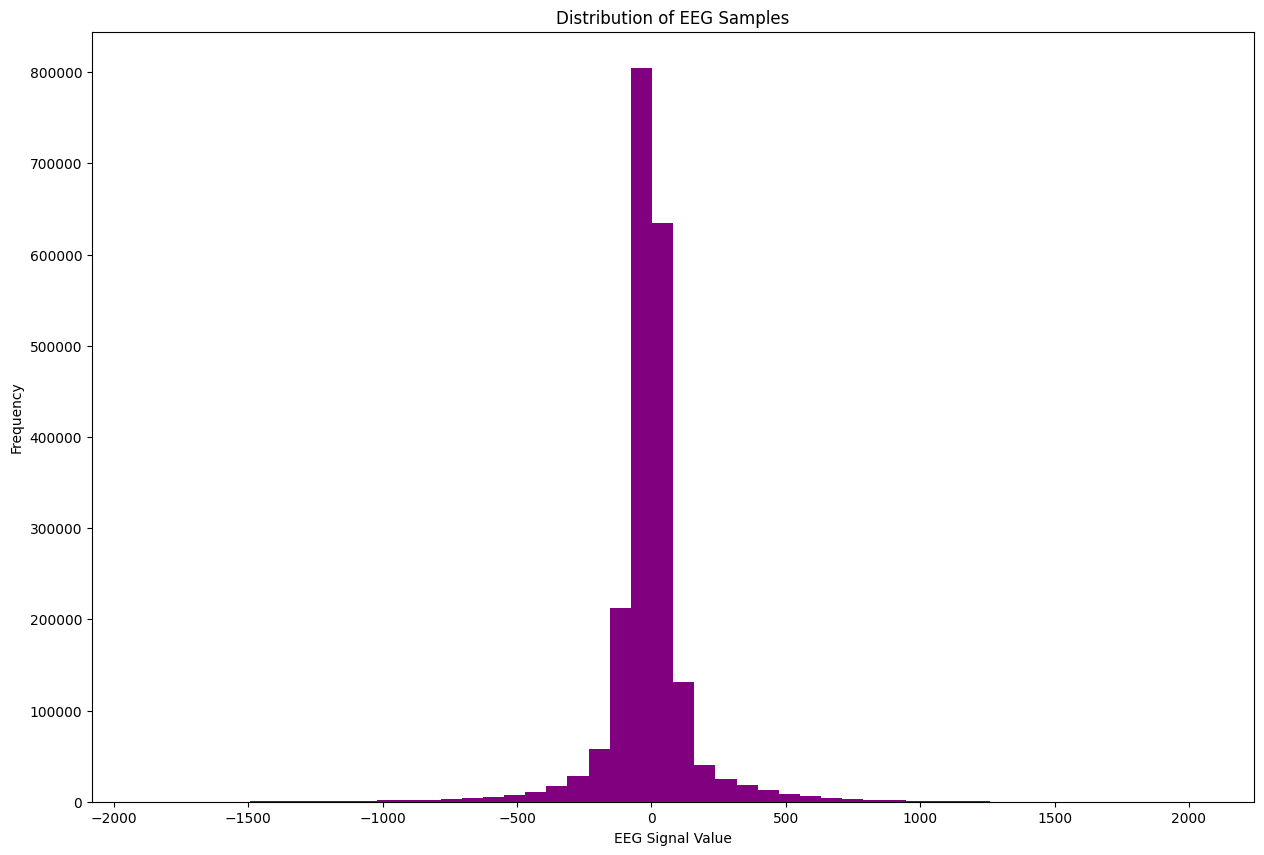

In [33]:
# Displaying basic information about the data
print("Data shape:", all_data.shape)

# Displaying summary statistics
print("Summary statistics:\n", pd.DataFrame(all_data).describe())

# Checking for missing values
missing_values = np.isnan(all_data).sum()
print("Missing Values:\n", missing_values)

# Visualizing the distribution of EEG samples
plt.figure(figsize=(15, 10))
plt.hist(all_data.flatten(), bins=50,color='purple')
plt.title('Distribution of EEG Samples')
plt.xlabel('EEG Signal Value')
plt.ylabel('Frequency')
plt.show()

FEATURE EXTRACTION

In [34]:
#Extracting relevant features from the EEG signals. 
#Considering time-domain and frequency-domain features.

def extract_time_domain_features(signal):
    mean_value = np.mean(signal)
    std_deviation = np.std(signal)
    skewness = skew(signal)
    kurt = kurtosis(signal)
    rms = np.sqrt(np.mean(np.square(signal)))
    
    return [mean_value, std_deviation, skewness, kurt, rms]

def extract_frequency_domain_features(signal, sampling_rate):
    freq, power_density = welch(signal, fs=sampling_rate, nperseg=256)
    
    # Extracting features from the power spectral density
    max_power_freq = freq[np.argmax(power_density)]
    total_power = np.sum(power_density)
    normalized_power = power_density / total_power
    
    # Calculating spectral entropy
    spectral_entropy = -np.sum(normalized_power * np.log2(normalized_power))
    
    return [max_power_freq, spectral_entropy]


sampling_rate = 250

# Assuming all_data is 2D array of EEG signals
for i in range(all_data.shape[0]):
    signal = all_data[i, :]
    
    # Extracting time-domain features
    time_domain_features = extract_time_domain_features(signal)
    
    # Extracting frequency-domain features
    frequency_domain_features = extract_frequency_domain_features(signal, sampling_rate)
    
    # Combining features into a single feature vector
    all_features = time_domain_features + frequency_domain_features
    
    print(f"Features for EEG Signal {i + 1}: {all_features}")

Features for EEG Signal 1: [28.570417378569687, 28.62507053383784, 0.0836471667718495, -0.18072031920125964, 40.443335820044176, 0.9765625, 3.7794442910807033]
Features for EEG Signal 2: [31.778374420307543, 133.47572179796714, 2.184076080531281, 8.93430826413078, 137.20653552322344, 0.9765625, 3.2296136578493444]
Features for EEG Signal 3: [-25.015865267268733, 71.95809056217087, 0.04984613338982067, -0.25497430735385773, 76.18241471903949, 1.953125, 3.6064092973185655]
Features for EEG Signal 4: [-35.25213570905541, 37.80157249426841, -0.14066049530938735, 0.3333998165038823, 51.688218726215446, 1.953125, 3.8381435334165723]
Features for EEG Signal 5: [-15.550646814742494, 84.28527598177443, 0.3154616536319146, 0.9611821233312301, 85.70781973472866, 2.9296875, 4.361669283221834]
Features for EEG Signal 6: [-33.69123749084696, 22.86761048579896, -0.08668033643854081, 0.0735681382360096, 40.71887882782229, 7.8125, 3.892058465106018]
Features for EEG Signal 7: [-27.657310226995364, 38.7

SPLITTING THE DATA :

In [35]:
#3.Spliting the data into training, validation, and test sets:

# Assuming labels are stored in all_names array
labels = np.array(all_names)

# Health labels: 'z' and 'o'
health_labels = np.isin(labels, ['Z', 'O'])

# Seizure labels: 'n', 'f', 's'
seizure_labels = np.isin(labels, ['N', 'F', 'S'])

# Spliting the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(all_data, health_labels, test_size=0.4, random_state=42, stratify=health_labels)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Displaying the shapes of the resulting sets
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Training set shape: (300, 4097)
Validation set shape: (100, 4097)
Test set shape: (100, 4097)


MODEL SELECTION :

In [ ]:
#Choosing an appropriate machine learning or deep learning model for EEG
#classification. Considering models like Convolutional Neural Networks (CNNs) or
#Recurrent Neural Networks (RNNs).

# Reshaping data for compatibility with 1D CNN
X_train_cnn = X_train[:, :, np.newaxis]
X_val_cnn = X_val[:, :, np.newaxis]
X_test_cnn = X_test[:, :, np.newaxis]

# Defining a simple 1D CNN model
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compiling and training the CNN model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(X_val_cnn, y_val))

# Predicting on the test set
y_pred_cnn_probs = cnn_model.predict(X_test_cnn)
y_pred_cnn = (y_pred_cnn_probs > 0.5).astype(int)

# Evaluating the CNN model
accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
print(f"Accuracy of CNN model: {accuracy_cnn}")

Epoch 1/10


c:\Users\dhanu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.5354 - loss: 288.9947 - val_accuracy: 0.6900 - val_loss: 68.8701
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6843 - loss: 40.2216 - val_accuracy: 0.7000 - val_loss: 102.9576
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7843 - loss: 25.9566 - val_accuracy: 0.6900 - val_loss: 119.2702
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8454 - loss: 26.5038 - val_accuracy: 0.7800 - val_loss: 58.0613
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8954 - loss: 5.7857 - val_accuracy: 0.7500 - val_loss: 71.9415
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9439 - loss: 3.5323 - val_accuracy: 0.7200 - val_loss: 104.1565
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9749 - loss: 1.1096 - val_accuracy: 0.7500 - val_loss: 44.3471
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9633 - loss: 1.8009 - val_accuracy: 0.7700

c:\Users\dhanu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


MODEL TRAINING :

In [47]:
#MODEL TRAINING:

# Compiling and train the CNN model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_data=(X_val_lstm, y_val))

# Predicting on the test set
y_pred_cnn_probs = cnn_model.predict(X_test_cnn)
y_pred_cnn = (y_pred_cnn_probs > 0.5).astype(int)

# Evaluating the LSTM model
accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
print(f"Accuracy of CNN model: {accuracy_cnn}")

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.9437 - loss: 5.7080 - val_accuracy: 0.6900 - val_loss: 95.1680
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8443 - loss: 16.7249 - val_accuracy: 0.7200 - val_loss: 91.7983
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.8697 - loss: 8.4757 - val_accuracy: 0.7000 - val_loss: 36.3319
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.9839 - loss: 0.6778 - val_accuracy: 0.8300 - val_loss: 93.0197
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9683 - loss: 1.5683 - val_accuracy: 0.7400 - val_loss: 57.8942
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9891 - loss: 0.5802 - val_accuracy: 0.8200 - val_loss: 78.3098
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9915 - loss: 0.1912 - val_accuracy: 0.8000 - val_loss: 61.9543
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9878 - loss: 0.3017 - val_accuracy: 0.

CLASSIFICATION REPORT FOR CNN MODEL :

In [46]:
# Predicting on the test set using CNN model
y_pred_cnn_probs = cnn_model.predict(X_test_cnn)
y_pred_cnn = (y_pred_cnn_probs > 0.5).astype(int)

# Generating the classification report for CNN model
report_cnn = classification_report(y_test, y_pred_cnn)
print("Classification Report for CNN Model:")
print(report_cnn)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Classification Report for CNN Model:
              precision    recall  f1-score   support

       False       0.74      0.97      0.84        60
        True       0.91      0.50      0.65        40

    accuracy                           0.78       100
   macro avg       0.83      0.73      0.74       100
weighted avg       0.81      0.78      0.76       100



MODEL EVALUATION :

In [42]:
#Model Evaluation

# Implementing early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Training the LSTM model with early stopping
history = cnn_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32,
                         validation_data=(X_val_lstm, y_val),
                         callbacks=[early_stopping])

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9755 - loss: 1.6202 - val_accuracy: 0.7300 - val_loss: 47.9273
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9918 - loss: 0.6829 - val_accuracy: 0.7100 - val_loss: 53.2237
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9832 - loss: 0.3200 - val_accuracy: 0.7700 - val_loss: 66.1377
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9751 - loss: 0.5716 - val_accuracy: 0.7200 - val_loss: 50.5573


MODEL TESTING :

In [44]:
#TESTING:
# Predicting on the validation set
y_pred_cnn_probs = cnn_model.predict(X_val_cnn)
y_pred_cnn = (y_pred_cnn_probs > 0.5).astype(int)

# Evaluating the LSTM model on the validation set
accuracy_cnn = accuracy_score(y_val, y_pred_cnn)
precision_cnn = precision_score(y_val, y_pred_cnn)
recall_cnn = recall_score(y_val, y_pred_cnn)
f1_cnn = f1_score(y_val, y_pred_cnn)

print(f"Validation Accuracy of CNN model: {accuracy_cnn}")
print(f"Validation Precision of CNN model: {precision_cnn:.2f}")
print(f"Validation Recall of CNN model: {recall_cnn}")
print(f"Validation F1 Score of CNN model: {f1_cnn:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Validation Accuracy of CNN model: 0.73
Validation Precision of CNN model: 0.76
Validation Recall of CNN model: 0.475
Validation F1 Score of CNN model: 0.58


VISUALIZATION :

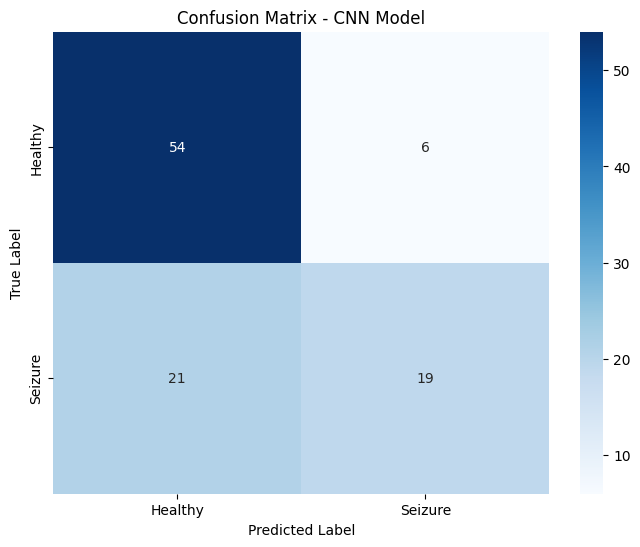

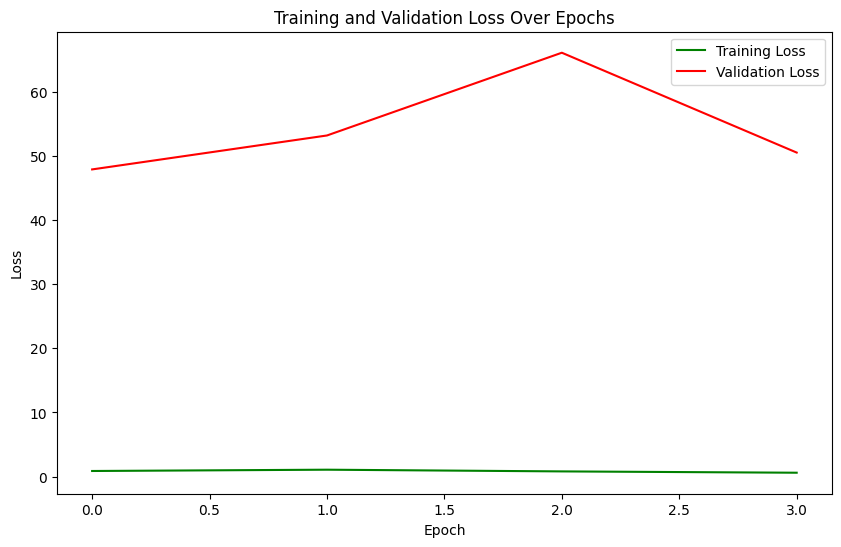

In [45]:
#Results and Visualization

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
conf_mat_cnn = confusion_matrix(y_val, y_pred_cnn)
sns.heatmap(conf_mat_cnn, annot=True, fmt='d', cmap='Blues', xticklabels=['Healthy', 'Seizure'], yticklabels=['Healthy', 'Seizure',],color='gold')
plt.title('Confusion Matrix - CNN Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Visualizing the training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss',color='green')
plt.plot(history.history['val_loss'], label='Validation Loss',color='red')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()